In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df= pd.read_csv("Shopping Mall Customer Segmentation Data .csv")

In [59]:
df

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76
...,...,...,...,...,...
15074,a0504768-a85f-4930-ac24-55bc8e4fec9e,29,Female,97723,30
15075,a08c4e0e-d1fe-48e7-9366-aab11ae409cd,22,Male,73361,74
15076,0e87c25a-268c-401a-8ba1-7111dcde6f1a,18,Female,112337,48
15077,5f388cbe-3373-4e16-b743-38f508f2249f,26,Female,94312,5


#### Dropping customer ID column 

In [60]:
df= df.drop(columns=['Customer ID'])

In [61]:
df.shape

(15079, 4)

In [62]:
df.isnull().sum()

Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

#### No null values are present

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             15079 non-null  int64 
 1   Gender          15079 non-null  object
 2   Annual Income   15079 non-null  int64 
 3   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 471.3+ KB


#### Distribution of Gender

In [64]:
df['Gender'].value_counts()

Gender
Male      7595
Female    7484
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

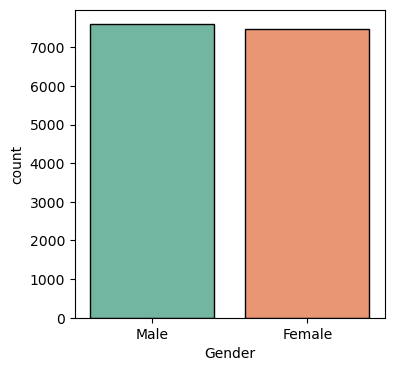

In [65]:
plt.figure(figsize=(4, 4))
sns.countplot(x= 'Gender', data=df, palette='Set2',edgecolor='black')


In [66]:
df['Gender']= df['Gender'].map({'Male':0, 'Female':1})
df

,Age,Gender,Annual Income,Spending Score
0,30,0,151479,89
1,58,1,185088,95
2,62,1,70912,76
3,23,0,55460,57
4,24,0,153752,76
...,...,...,...,...
15074,29,1,97723,30
15075,22,0,73361,74
15076,18,1,112337,48
15077,26,1,94312,5


In [67]:
df.describe()

,Age,Gender,Annual Income,Spending Score
count,15079.000000,15079.000000,15079.000000,15079.000000
mean,54.191591,0.496319,109742.880562,50.591617
std,21.119207,0.500003,52249.425866,28.726977
min,18.000000,0.000000,20022.000000,1.000000
25%,36.000000,0.000000,64141.000000,26.000000
50%,54.000000,0.000000,109190.000000,51.000000
75%,72.000000,1.000000,155008.000000,75.000000
max,90.000000,1.000000,199974.000000,100.000000


<Axes: >

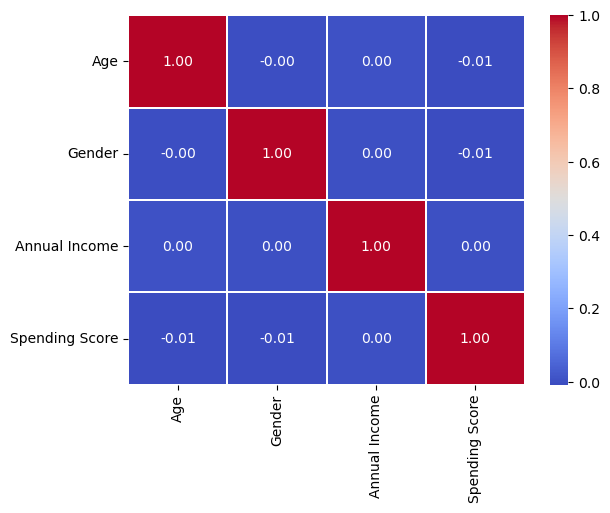

In [68]:
sns.heatmap(df.corr(), annot= True, cmap= 'coolwarm', linewidth= 0.2, fmt= "0.2f")

#### Age distribution

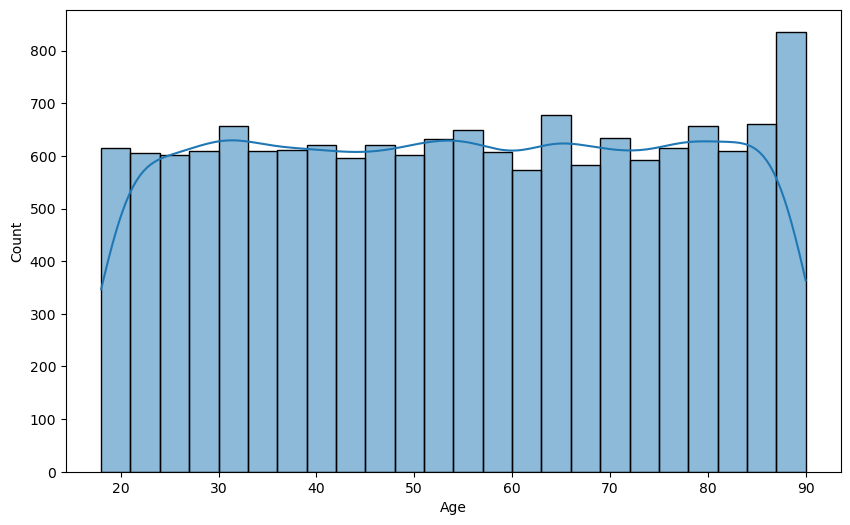

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=24)
plt.show()

#### Distribution of income

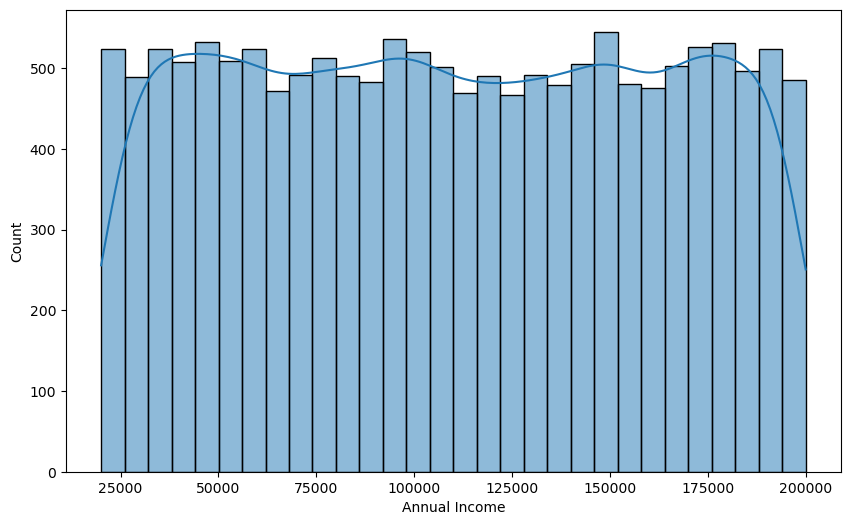

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income'], kde=True, bins=30)
plt.show()

#### Distribution of Spending Score

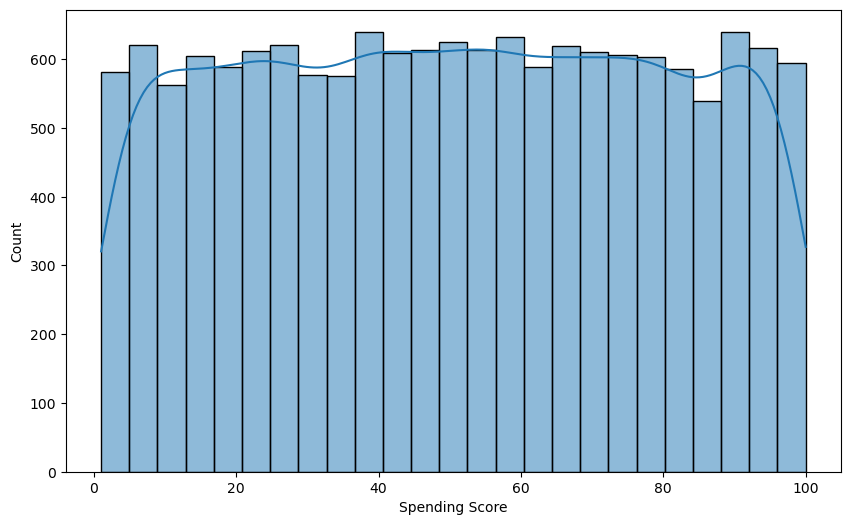

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score'], kde=True, bins=25)
plt.show()

#### Outliers

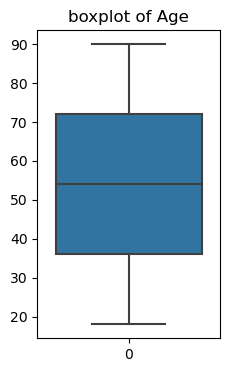

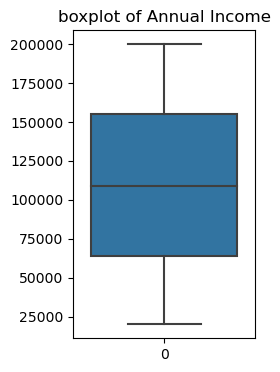

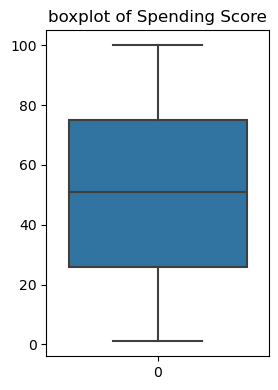

In [72]:
col=['Age', 'Annual Income', 'Spending Score']

length= len(col)
row= (length+2)//3

for k,var in enumerate(col):
    plt.figure(figsize=(8,4))
    plt.subplot(row,3,k+1)
    sns.boxplot(df[var])
    plt.title(f'boxplot of {var}')
    
plt.tight_layout()
plt.show()

#### No outliers are present

#### Importing libraries

In [73]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#### Scaling of the data

In [74]:
scaler= StandardScaler()
scaled_df= scaler.fit_transform(df)

#### Customer Segmentation using K-Means Clustering

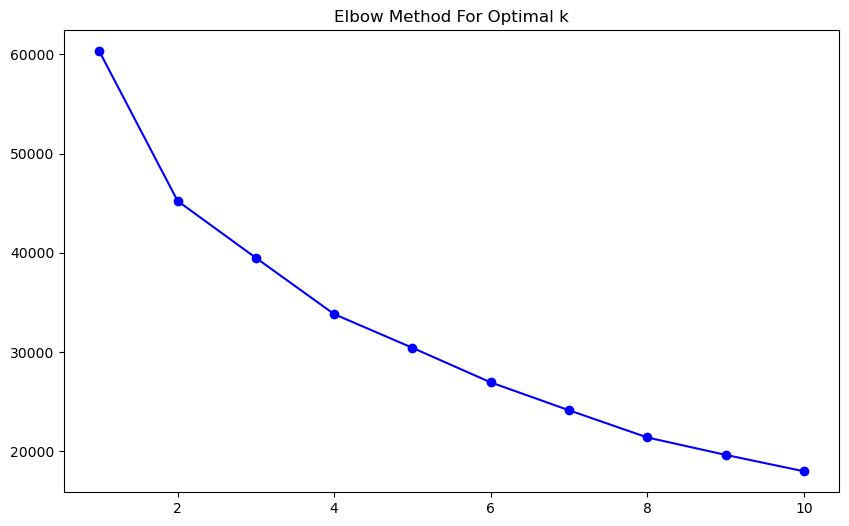

In [75]:
import warnings
warnings.filterwarnings("ignore")

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method For Optimal k')
plt.show()

In [80]:
scaled_df

array([[-1.14551615, -0.99266566,  0.79881267,  1.33705873],
       [ 0.18033514,  1.00738853,  1.44207552,  1.54592857],
       [ 0.36974247,  1.00738853, -0.74320756,  0.88450743],
       ...,
       [-1.71373813,  1.00738853,  0.04965041, -0.09021845],
       [-1.33492347,  1.00738853, -0.2953409 , -1.58711891],
       [-1.6663863 , -0.99266566, -0.60668478, -1.69155383]])

In [95]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Clusters'] = kmeans.fit_predict(scaled_df)

In [100]:
X = df[['Age', 'Gender','Annual Income', 'Spending Score']]
y = df['Clusters']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [101]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [102]:
model = LogisticRegression(multi_class='ovr', max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [103]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9993368700265252